**Support Vector Machine**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [ ]:

# Generate sample data
data1 = np.random.rand(100, 2) * 10
data2 = np.random.rand(100, 2) * 10 + 5
output = np.concatenate((np.zeros(100), np.ones(100)))

# Combine data into a pandas DataFrame (optional, but good practice)
data = pd.DataFrame(np.vstack((data1, data2)), columns=['data1', 'data2'])
data['output'] = output

data

,data1,data2,output
0,4.281841,9.666548,0.0
1,9.636200,8.530095,0.0
2,2.944489,3.850977,0.0
3,8.511367,3.169220,0.0
4,1.694927,5.568013,0.0
...,...,...,...
195,10.326173,7.424705,1.0
196,7.692432,8.772842,1.0
197,5.200712,8.220792,1.0
198,7.114480,8.274974,1.0


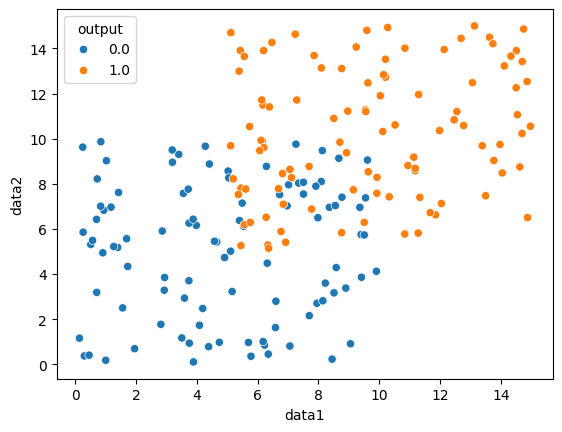

In [ ]:
sns.scatterplot(x='data1', y='data2', hue='output', data=data)
plt.show()


In [ ]:
x = data.drop('output', axis=1)
y = data['output']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(x_train, y_train)

SVC()

In [ ]:
model.score(x_test, y_test)*100,model.score(x_train, y_train)*100

(72.5, 85.0)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


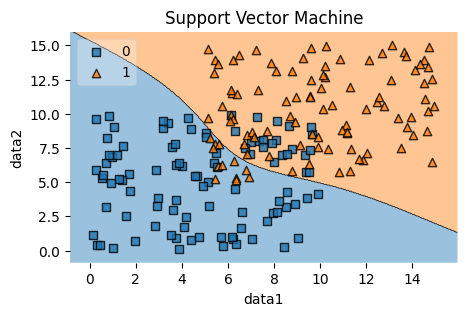

In [ ]:
plt.figure(figsize=(5, 3))
# Convert y to integer type before passing to plot_decision_regions
plot_decision_regions(x.values, y.values.astype(int), clf=model, legend=2)
plt.xlabel('data1')
plt.ylabel('data2')
plt.title('Support Vector Machine')

plt.show()

In [ ]:
model.predict([[	6.292436,81.297909]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0.])

**Support Vector Machine Regression**

In [ ]:
# prompt: generate dataset to cgpa and package

# Generate synthetic data for CGPA and Package
np.random.seed(42) # for reproducibility
num_students = 200
cgpa = np.random.uniform(6.0, 10.0, num_students)
# Assume a roughly linear relationship with some noise
package = (cgpa * 2.5) + np.random.normal(0, 1.5, num_students)

# Ensure packages are non-negative
package[package < 0] = 0

# Create a DataFrame
df = pd.DataFrame({'CGPA': cgpa, 'Package': package})
df


,CGPA,Package
0,7.498160,17.725364
1,9.802857,24.855524
2,8.927976,22.759548
3,8.394634,19.915058
4,6.624075,19.358848
...,...,...
195,7.396838,16.380900
196,8.903823,21.181890
197,9.588441,23.650932
198,9.548346,24.337226


<Axes: xlabel='CGPA', ylabel='Package'>

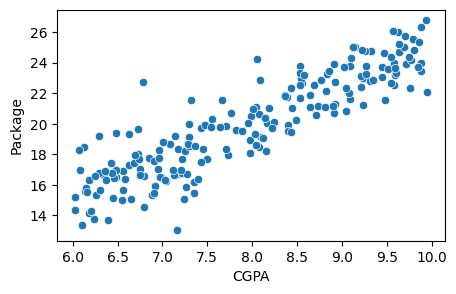

In [ ]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='CGPA', y='Package', data=df)

In [ ]:
x = df.drop('Package', axis=1)
y = df['Package']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVR
sr = SVR(kernel='linear')
sr.fit(x_train, y_train)

SVR(kernel='linear')

In [ ]:
sr.score(x_test, y_test)*100,sr.score(x_train, y_train)*100

(74.08814173670737, 81.16391869674857)

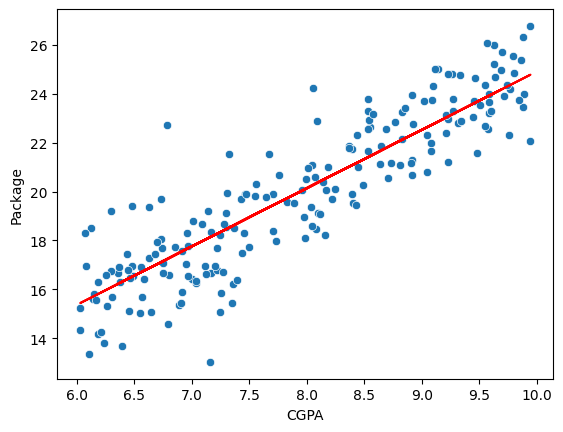

In [ ]:
sns.scatterplot(x='CGPA', y='Package', data=df)
plt.plot(x_test, sr.predict(x_test), color='red')
plt.show()

In [ ]:
# prompt: generate dataset to level and salary batter accuracy

# Generate synthetic data for Employee Level and Salary
np.random.seed(42) # for reproducibility
num_employees = 300
# Employee Level (integer values representing seniority/level)
level = np.random.randint(1, 11, num_employees) # Levels from 1 to 10
# Assume a non-linear relationship with some noise and increasing variance with level
# Using an exponential growth pattern + noise
salary = 50000 + (level *2) * 2000

# Ensure salaries are non-negative (though unlikely with this formula)
salary[salary < 0] = 0

# Create a DataFrame
dfs = pd.DataFrame({'Level': level, 'Salary': salary})
dfs

,Level,Salary
0,7,78000
1,4,66000
2,8,82000
3,5,70000
4,7,78000
...,...,...
295,1,54000
296,5,70000
297,6,74000
298,3,62000


In [ ]:
x = dfs.drop('Salary', axis=1)
y = dfs['Salary']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
sr1 = SVR(kernel='poly')
sr1.fit(x_train, y_train)

SVR(kernel='poly')

In [ ]:
sr1.score(x_test, y_test)*100,sr1.score(x_train, y_train)*100

(85.65381525825103, 82.74845301440416)

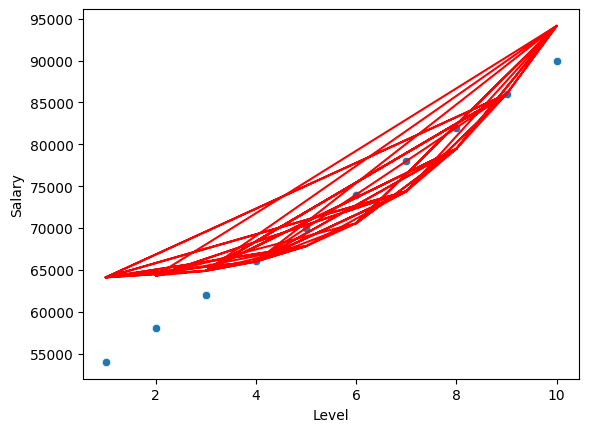

In [ ]:
sns.scatterplot(x='Level', y='Salary', data=dfs)
plt.plot(x_test, sr1.predict(x_test), color='red')
plt.show()